In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import nltk
import nltk.sentiment
import re

from requests import get
from bs4 import BeautifulSoup
import os

import acquire
import prepare

In [2]:
#acquire.acquire_repo_list('petroleum')

In [3]:
#acquire.acquire_repo_list('solar energy')

In [4]:
#acquire.acquire_repo_list('natural gas')

In [5]:
#df = acquire.scrape_github_data()

In [6]:
df = pd.read_csv('all_repos_dict.csv')

In [7]:
df

,repo,language,readme_contents
0,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,Python,# Machine-Learning-for-Solar-Energy-Prediction...
1,meltaxa/solariot,Python,# Solariot\n\nLeverage your IoT enabled Solar ...
2,renewables-ninja/gsee,Python,[![Master branch build status](https://img.shi...
3,3KUdelta/Solar_WiFi_Weather_Station,C++,# Zambretti Forecaster on Solar WiFi Weather S...
4,ropensci/nasapower,R,\n[![R build status](https://github.com/ropens...
...,...,...,...
295,agregoire/qc-drilling-timeline,JavaScript,No README
296,chrord/Data_driven_Distributed_Operation_of_El...,NaN,# Data-driven Distributed Operation of Electri...
297,chaiitanyasangani88/OperationalFlowRateVariation,MATLAB,# OperationalFlowCaseStudy\nA detailed study a...
298,jaburney/naturalgastransition,R,## Coal-to-Natural Gas Transition Impacts Anal...


In [8]:
df.loc[:100, 'category'] = 'solar_energy'

In [9]:
df.loc[100:200, 'category'] = 'petroleum'

In [10]:
df.loc[200:, 'category'] = 'natural_gas'

In [11]:
df = prepare.prep_repo_data(df)

In [12]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
294,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
296,NaN,natural_gas,chrord/Data_driven_Distributed_Operation_of_El...,# Data-driven Distributed Operation of Electri...,"[datadriven, distributed, operation, of, elect...",datadriven distribut oper electr natur ga syst...,datadriven distributed operation electricity n...
297,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
298,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [13]:
df.shape

(241, 7)

In [32]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.dropna(inplace=True)

In [33]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
209,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
211,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
212,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


In [58]:
df.clean_lemmatized.apply(len).nlargest(15)

15     84881
16     16389
47     10445
72      7272
95      7017
8       6776
140     6555
42      6537
92      6469
99      6357
10      5877
24      5808
71      5526
104     5129
66      5115
Name: clean_lemmatized, dtype: int64

In [63]:
df = df[df.index!=15]

In [64]:
df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...
...,...,...,...,...,...,...,...
209,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...
211,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...
212,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...


Text(0.5, 0, 'Number of occurances')

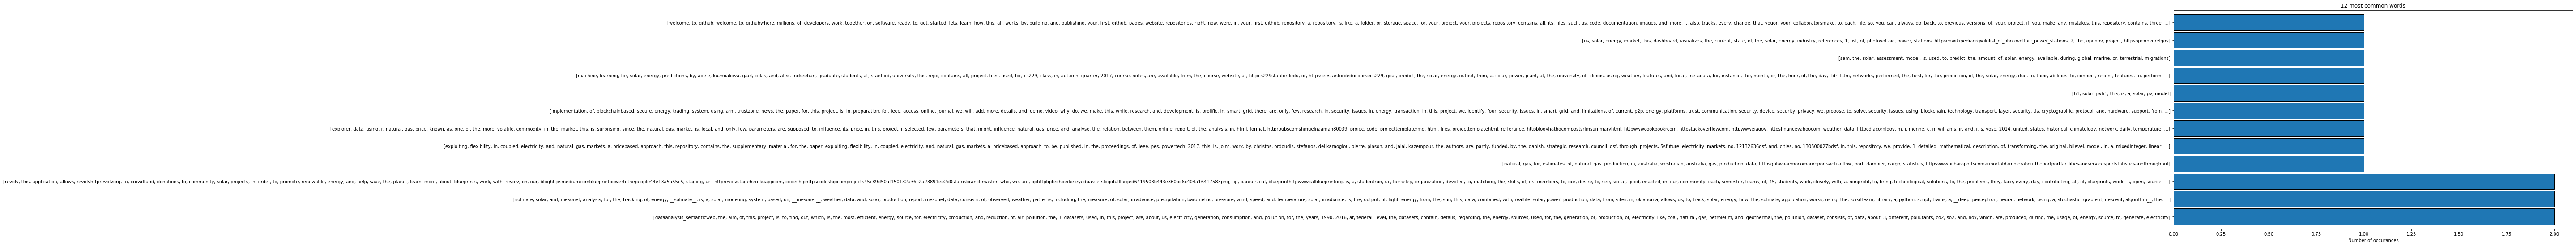

In [38]:
plt.figure(figsize=(16, 9))
pd.Series(df.clean_tokes).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [62]:
df.repo[16]

'abdullah2891/solar_energy_calculator'

In [55]:
titan.to_csv('titan.csv')

Text(0.5, 0, 'Number of occurances')

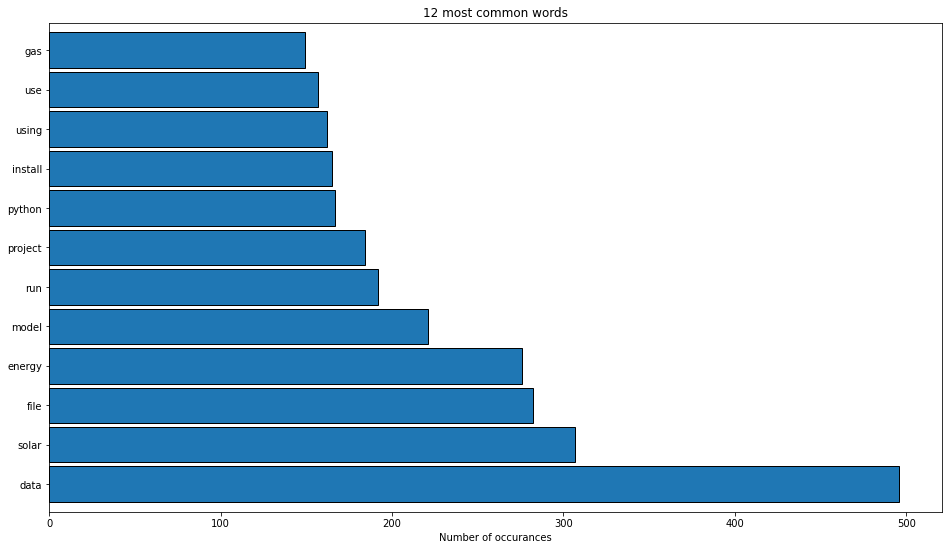

In [65]:
#ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

all_words = clean(' '.join(df.readme_contents))

plt.figure(figsize=(16, 9))
pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [ ]:
df.clean_stemmed.str.len()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          213 non-null    object
 1   category          213 non-null    object
 2   repo              213 non-null    object
 3   readme_contents   213 non-null    object
 4   clean_tokes       213 non-null    object
 5   clean_stemmed     213 non-null    object
 6   clean_lemmatized  213 non-null    object
dtypes: object(7)
memory usage: 13.3+ KB


In [37]:
df.describe()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized
count,214,214,214,214,214,214,214
unique,28,3,212,211,211,211,211
top,Python,solar_energy,lakhanimanan111/DataAnalysis_SemanticWeb,# SOLMATE\n\n ## Solar and Mesonet Analysis fo...,"[dataanalysis_semanticweb, the, aim, of, this,...",dataanalysis_semanticweb aim thi project find ...,solmate solar mesonet analysis tracking energy...
freq,42,85,2,2,2,2,2
